# Проект: анализ зарплат в России

В проекте мы будем пользоваться открытыми данными из официальных источников:

[Сайт Росстата](https://rosstat.gov.ru/)

[Таблицы уровня инфляции в России](https://уровень-инфляции.рф/)


## Общая информация о данных

### Загрузка библиотек, датасетов с данными

In [843]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [844]:
# загрузка данных по инфляции
inflation = pd.read_csv('inf.csv', sep=';')

In [845]:
# Загрузка данных
data = pd.read_csv('C:\\Users\\Polina\\Проект Start_DS\\venv\\data\\salary_1.csv', sep=';')
data2 = pd.read_csv('C:\\Users\\Polina\\Проект Start_DS\\venv\\data\\salary_2.csv', sep=';')
data3 = pd.read_csv('C:\\Users\\Polina\\Проект Start_DS\\venv\\data\\inf.csv', sep=';')

In [846]:
# выведем 5 строк данных по заработной плате по видам деятельности за 2000 - 2016
data.head()

,Вид,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Всего по экономике,2223,3240,4360,5499,6740,8555,10634,13593,17290,18638,20952,23369,26629,29792,32495,34030,36709
1,"Сельское хозяйство, охота и лесное хозяйство",985,1435,1876,2340,3015,3646,4569,6144,8475,9619,10668,12464,14129,15724,17724,19721,21755
2,"Рыболовство, рыбоводство",2846,3839,5031,5445,7085,10234,12311,14797,19499,22914,23782,25940,29201,32437,37062,46676,54927
3,Добыча полезных ископаемых,5940,9099,11081,13912,16842,19727,23145,28108,33206,35363,39895,45132,50401,54161,58959,63695,69936
4,добыча топливно-энергетических полезных ископ...,6985,10905,13080,16136,19903,23456,27615,33276,39051,41568,46271,51588,57210,61084,66780,71418,77586


In [847]:
# выведем 5 строк данных по заработной плате по видам деятельности за 2017 - 2023
data2.head()

,Вид,2017,2018,2019,2020,2021,2022,2023
0,Всего,39167,43724,47867,51344,57244,65338,73709
1,"Cельское, лесное хозяйство, охота, рыболовство...",25671,28699,31728,34770,39437,46777,52868
2,"растениеводство и животноводство, охота и пред...",23529,25820,28396,31058,35460,41994,47583
3,лесоводство и лесозаготовки,27617,32701,35426,37855,42152,48327,52416
4,рыболовство и рыбоводство,68032,75766,88604,94983,101547,121726,139520


In [848]:
# выведем первые 5 строк датасета с инфляцией
data3.head()

,Вид,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,инфляция,20.20%,18.58%,15.06%,11.99%,11.74%,10.91%,9.00%,11.87%,13.28%,...,11.36%,12.91%,5.38%,2.52%,4.27%,3.05%,4.91%,8.39%,11.92%,7.42%


Рассмотрим изменения номинальной заработной платы в сфере производства продуктов,  образования и строительства

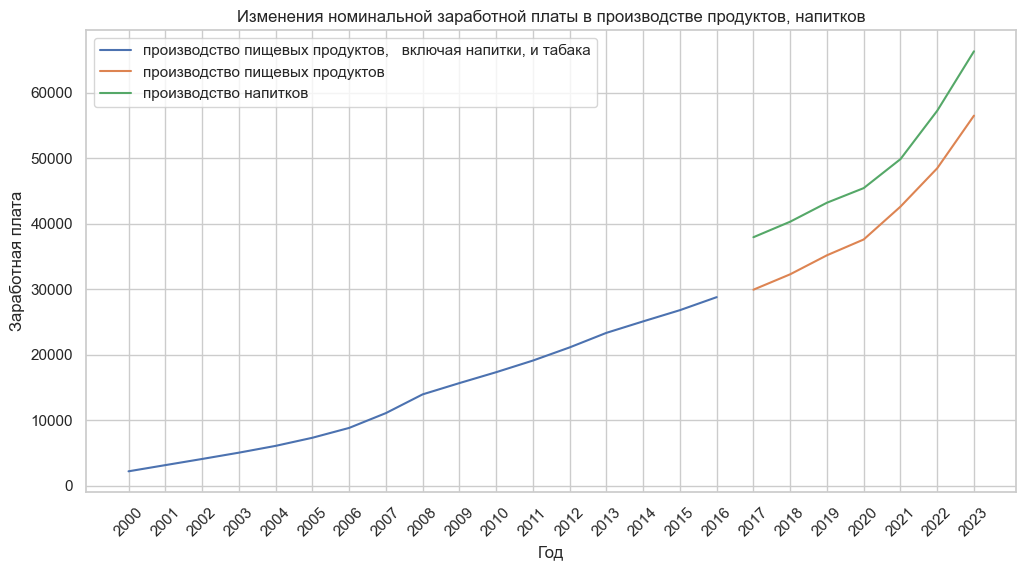

In [849]:
# задаем размеры графика
fig, ax = plt.subplots(figsize=(12, 6))

# Фильтрация данных по сфере производства продуктов
data_production = data[data['Вид'] == 'производство пищевых продуктов,   включая напитки, и табака']
values1 = data_production.values[0][1:].astype(float)

# Построение первого графика
ax.plot(data_production.columns[1:], values1, label='производство пищевых продуктов,   включая напитки, и табака')

# Построение второго графика
data2_production = data2[data2['Вид'] == 'производство пищевых продуктов']
values2 = data2_production.values[0][1:].astype(float)
ax.plot(data2_production.columns[1:], values2, label='производство пищевых продуктов')

# Построение третьего графика
data3_production = data2[data2['Вид'] == 'производство напитков']
values3 = data3_production.values[0][1:].astype(float)

ax.plot(data3_production.columns[1:], values3, label='производство напитков')

ax.set_xlabel('Год')  # Подпись оси X
ax.set_ylabel('Заработная плата')  # Подпись оси Y
ax.set_title('Изменения номинальной заработной платы в производстве продуктов, напитков')  # Заголовок графика
ax.legend()  # Добавление легенды
plt.xticks(rotation=45)
plt.show()

Вывод: на основании построенного графика видно, что номинальная заработная плата в сфере производства пищевых продутов стабильно растет. Но необходимо отметить, что данные за 2001 - 2016 гг включают данные о производстве напитков и табака. Поэтому для более точной динамики роста номинальной заработной платы в сфере производства пищевых продуктов необходимо исследовать отдельно производство пищевых продуктов и напитков. За период с 2017 по 2023 год наблюдается рост зарплат в производстве пищевых продуктов. Однако рост зарплат в сфере производства напитков выше, чем производство продуктов.

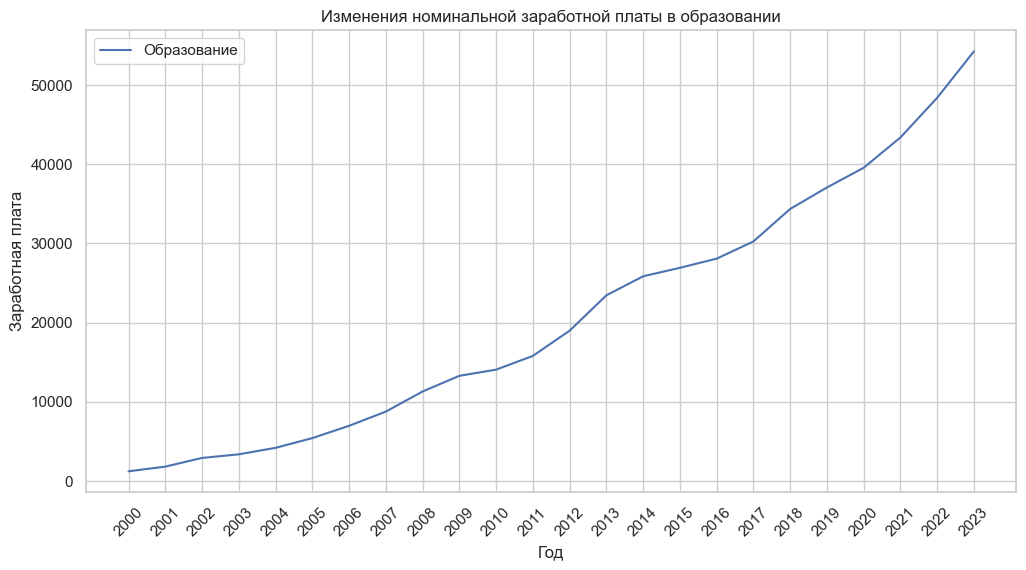

In [850]:
# Построение графика по виду деятельности "Образование"
# Фильтрация данных по сфере "Образование"
data_education = data[data['Вид'] == 'Образование']
data2_education = data2[data2['Вид'] == 'Образование']

# Объединение данных по году
data_combined = pd.merge(data_education, data2_education)

values = data_combined.values[0][1:].astype(float)
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(data_combined.columns[1:], values, label='Образование')


ax1.set_xlabel('Год')  # Подпись оси X
ax1.set_ylabel('Заработная плата')  # Подпись оси Y
ax1.set_title('Изменения номинальной заработной платы в образовании')  # Заголовок графика
ax1.legend()  # Добавление легенды
plt.xticks(rotation=45)
plt.show()

Вывод: на основании графика можно сделать вывод, что номинальная заработная плата в сфере "Образования" стабильно растет за период с 2000 по 2023 гг.

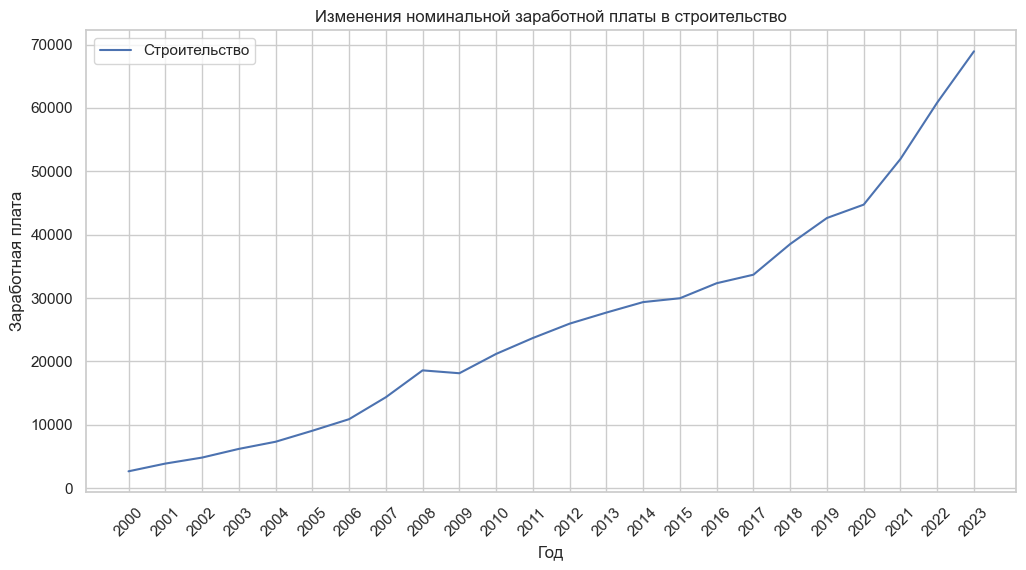

In [851]:
# Построение графика по виду деятельности "Строительство"
# Фильтрация данных по сфере "Строительство"
data_construction = data[data['Вид'] == 'Строительство']
data2_construction = data2[data2['Вид'] == 'Строительство']

# Объединение данных по году
data2_combined = pd.merge(data_construction, data2_construction)

values = data2_combined.values[0][1:].astype(float)
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.plot(data2_combined.columns[1:], values, label='Строительство')


ax2.set_xlabel('Год')  # Подпись оси X
ax2.set_ylabel('Заработная плата')  # Подпись оси Y
ax2.set_title('Изменения номинальной заработной платы в строительство')  # Заголовок графика
ax2.legend()  # Добавление легенды
plt.xticks(rotation=45)
plt.show()

Вывод: на основании графика можно сделать вывод о стабильном росте номинальной заработной платы в сфере "Строительство". Необходимо отметить, что рост ускорился с 2020 года.

### Анализ влияния инфляции

**Образование**

In [852]:
# Объединим данные по номинальной заработной плате и инфляции в один датафрейм
data_ed_inf = pd.concat([data_combined, data3], axis=0)

In [853]:
data_ed_inf

,Вид,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Образование,1240,1833,2927,3387,4203,5430,6983,8778,11317,...,25862,26928,28088,30258,34361,37072,39563,43391,48400,54263
0,инфляция,20.20%,18.58%,15.06%,11.99%,11.74%,10.91%,9.00%,11.87%,13.28%,...,11.36%,12.91%,5.38%,2.52%,4.27%,3.05%,4.91%,8.39%,11.92%,7.42%


In [854]:
# транспонируем полученный датафрейм
data_ed_inf_tr = data_ed_inf.set_index('Вид').T


In [855]:
data_ed_inf_tr

Вид,Образование,инфляция
2000,1240,20.20%
2001,1833,18.58%
2002,2927,15.06%
2003,3387,11.99%
2004,4203,11.74%
2005,5430,10.91%
2006,6983,9.00%
2007,8778,11.87%
2008,11317,13.28%
2009,13294,8.80%


In [856]:
# проверим типы данных перед расчетом
data_ed_inf_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Образование  24 non-null     object
 1   инфляция     24 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes


Данные имеют тип "object". Для дальнейших расчетов влияния инфляции необходимы типы данных "int" и "float"

In [857]:
data_ed_inf_tr['Образование'] = data_ed_inf_tr['Образование'].astype(int)
data_ed_inf_tr['инфляция'] = data_ed_inf_tr['инфляция'].str.rstrip('%').astype(float) 

In [858]:
data_ed_inf_tr['инфляция'] = data_ed_inf_tr['инфляция'] / 100

In [859]:
data_ed_inf_tr

Вид,Образование,инфляция
2000,1240,0.2020
2001,1833,0.1858
2002,2927,0.1506
2003,3387,0.1199
2004,4203,0.1174
2005,5430,0.1091
2006,6983,0.0900
2007,8778,0.1187
2008,11317,0.1328
2009,13294,0.0880


In [860]:
# рассчитаем столбец с накопленной инфляцией
data_ed_inf_tr['накопленная инфляция'] = (1 + data_ed_inf_tr['инфляция']).cumprod() - 1

In [861]:
data_ed_inf_tr

Вид,Образование,инфляция,накопленная инфляция
2000,1240,0.2020,0.202000
2001,1833,0.1858,0.425332
2002,2927,0.1506,0.639987
2003,3387,0.1199,0.836621
2004,4203,0.1174,1.052240
2005,5430,0.1091,1.276140
2006,6983,0.0900,1.480992
2007,8778,0.1187,1.775486
2008,11317,0.1328,2.144071
2009,13294,0.0880,2.420749


In [862]:
# пересчитаем заработную плату с учетом влияния инфляции
data_ed_inf_tr['зарплата_инф'] = (data_ed_inf_tr['Образование'] / (1 + data_ed_inf_tr['накопленная инфляция'])).round(2)


In [863]:
data_ed_inf_tr

Вид,Образование,инфляция,накопленная инфляция,зарплата_инф
2000,1240,0.2020,0.202000,1031.61
2001,1833,0.1858,0.425332,1286.02
2002,2927,0.1506,0.639987,1784.77
2003,3387,0.1199,0.836621,1844.15
2004,4203,0.1174,1.052240,2048.01
2005,5430,0.1091,1.276140,2385.62
2006,6983,0.0900,1.480992,2814.60
2007,8778,0.1187,1.775486,3162.69
2008,11317,0.1328,2.144071,3599.47
2009,13294,0.0880,2.420749,3886.28


In [864]:
# рассчитаем столбец изменения в % заработной платы с учетом влияния инфляции
data_ed_inf_tr['изменение_зарплаты_%'] = data_ed_inf_tr['зарплата_инф'].pct_change() * 100

In [865]:
data_ed_inf_tr

Вид,Образование,инфляция,накопленная инфляция,зарплата_инф,изменение_зарплаты_%
2000,1240,0.2020,0.202000,1031.61,NaN
2001,1833,0.1858,0.425332,1286.02,24.661452
2002,2927,0.1506,0.639987,1784.77,38.782445
2003,3387,0.1199,0.836621,1844.15,3.327039
2004,4203,0.1174,1.052240,2048.01,11.054415
2005,5430,0.1091,1.276140,2385.62,16.484783
2006,6983,0.0900,1.480992,2814.60,17.981908
2007,8778,0.1187,1.775486,3162.69,12.367299
2008,11317,0.1328,2.144071,3599.47,13.810396
2009,13294,0.0880,2.420749,3886.28,7.968118


In [866]:
data_ed_inf_tr['инфляция_%'] = data_ed_inf_tr['инфляция'] * 100

In [867]:
data_ed_inf_tr

Вид,Образование,инфляция,накопленная инфляция,зарплата_инф,изменение_зарплаты_%,инфляция_%
2000,1240,0.2020,0.202000,1031.61,NaN,20.20
2001,1833,0.1858,0.425332,1286.02,24.661452,18.58
2002,2927,0.1506,0.639987,1784.77,38.782445,15.06
2003,3387,0.1199,0.836621,1844.15,3.327039,11.99
2004,4203,0.1174,1.052240,2048.01,11.054415,11.74
2005,5430,0.1091,1.276140,2385.62,16.484783,10.91
2006,6983,0.0900,1.480992,2814.60,17.981908,9.00
2007,8778,0.1187,1.775486,3162.69,12.367299,11.87
2008,11317,0.1328,2.144071,3599.47,13.810396,13.28
2009,13294,0.0880,2.420749,3886.28,7.968118,8.80


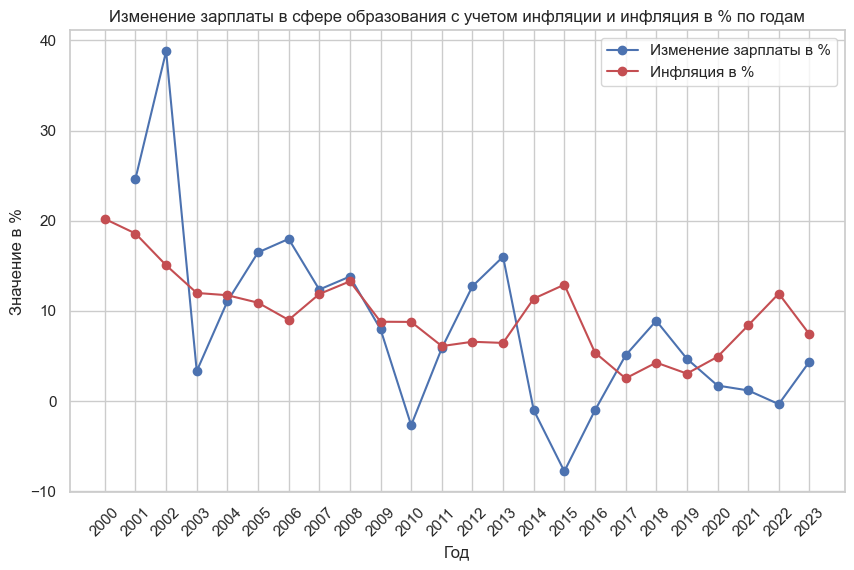

In [868]:
# построим график изменения в % заработной платы с учетом вляиния инфляции и инфляции за 2000-2023
plt.figure(figsize=(10, 6))
plt.plot(data_ed_inf_tr.index, data_ed_inf_tr['изменение_зарплаты_%'], marker='o', color='b', label='Изменение зарплаты в %')
plt.plot(data_ed_inf_tr.index, data_ed_inf_tr['инфляция_%'], marker='o', color='r', label='Инфляция в %')
plt.xlabel('Год')
plt.ylabel('Значение в %')
plt.title('Изменение зарплаты в сфере образования с учетом инфляции и инфляция в % по годам')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Вывод: по графику можно сделать следующие выводы**

**заработная плата с учетом влияния инфляции росла выше уровня инфляции в периоды: 2001 - 2002, 2004 - 2008, 2011-2013, 2017 - 2019, то есть рост реальной заработной платы был выше роста инфляции, в среднем - 8%-12%. Самый значительный рост (25-30%) наблюдался в период 2001 - 2002 гг.**

**За периоды: 2002 - 2004, 2008 - 2011, 2013 - 2017, 2019 - 2023 уровень инфляции выше, чем рост реальной заработной платы, в среднем рост составлял в эти периоды 0%-5% и есть периоды (2014-2016), где реальная заработная плата снижалась до -8%.**

**Для получения более точных значений средних величин изменений по периодам можно провести дополнительные расчеты**

**Строительство**

In [869]:
# Объединим данные по номинальной заработной плате и инфляции в один датафрейм
data_cons_inf = pd.concat([data2_combined, data3], axis=0)

In [870]:
data_cons_inf

,Вид,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Строительство,2640,3859,4807,6177,7305,9043,10869,14333,18574,...,29354,29960,32332,33678,38518,42630,44738,51944,60850,68944
0,инфляция,20.20%,18.58%,15.06%,11.99%,11.74%,10.91%,9.00%,11.87%,13.28%,...,11.36%,12.91%,5.38%,2.52%,4.27%,3.05%,4.91%,8.39%,11.92%,7.42%


In [871]:
# транспонируем полученный датафрейм
data_cons_inf_tr = data_cons_inf.set_index('Вид').T

In [872]:
# проверим типы данных перед расчетом
data_cons_inf_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Строительство  24 non-null     object
 1   инфляция       24 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes


Данные имеют тип "object". Для дальнейших расчетов влияния инфляции необходимы типы данных "int" и "float"

In [873]:
data_cons_inf_tr['Строительство'] = data_cons_inf_tr['Строительство'].astype(int)
data_cons_inf_tr['инфляция'] = data_cons_inf_tr['инфляция'].str.rstrip('%').astype(float) 

In [874]:
data_cons_inf_tr['инфляция'] = data_cons_inf_tr['инфляция'] / 100

In [875]:
# рассчитаем столбец с накопленной инфляцией
data_cons_inf_tr['накопленная инфляция'] = (1 + data_cons_inf_tr['инфляция']).cumprod() - 1

In [876]:
# пересчитаем заработную плату с учетом влияния инфляции
data_cons_inf_tr['зарплата_инф'] = (data_cons_inf_tr['Строительство'] / (1 + data_ed_inf_tr['накопленная инфляция'])).round(2)


In [877]:
# рассчитаем столбец изменения в % заработной платы с учетом влияния инфляции
data_cons_inf_tr['изменение_зарплаты_%'] = data_cons_inf_tr['зарплата_инф'].pct_change() * 100

In [878]:
# добавим столбец с инфляцией в %
data_cons_inf_tr['инфляция_%'] = data_cons_inf_tr['инфляция'] * 100

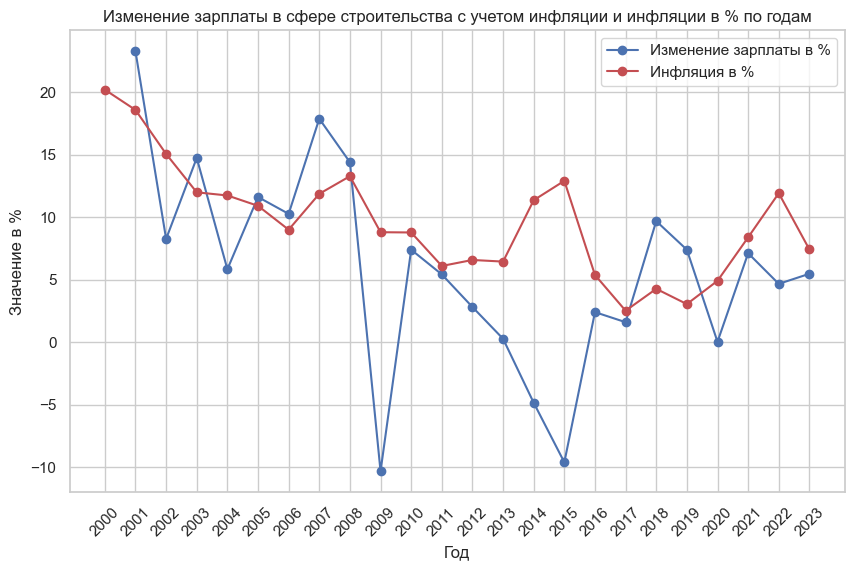

In [879]:
# построим график изменения в % заработной платы с учетом вляиния инфляции и инфляции за 2000-2023
plt.figure(figsize=(10, 6))
plt.plot(data_cons_inf_tr.index, data_cons_inf_tr['изменение_зарплаты_%'], marker='o', color='b', label='Изменение зарплаты в %')
plt.plot(data_cons_inf_tr.index, data_cons_inf_tr['инфляция_%'], marker='o', color='r', label='Инфляция в %')
plt.xlabel('Год')
plt.ylabel('Значение в %')
plt.title('Изменение зарплаты в сфере строительства с учетом инфляции и инфляции в % по годам')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Вывод: по графику можно сделать следующие выводы**

**заработная плата с учетом влияния инфляции росла выше уровня инфляции в периоды: 2001, 2003,  2002, 2005 - 2008, 2018 - 2019, то есть рост реальной заработной платы был выше роста инфляции, в среднем - 8%-10%. Самый значительный рост (22-23%) наблюдался в период 2001  гг.**

**За периоды: 2002, 2004, 2009 - 2017, 2020 - 2023 уровень инфляции выше, чем рост реальной заработной платы, в среднем рост составлял в эти периоды 0%-2% и есть периоды (2009, 2013 - 2015), где реальная заработная плата снижалась до -10%.**

**Для получения более точных значений средних величин изменений по периодам можно провести дополнительные расчеты**

**Производство пищевых продуктов**

In [880]:
# Объединим данные по номинальной заработной плате и инфляции в один датафрейм
data_prod_inf = pd.concat([data_production, data2_production, data3], axis=0)

In [881]:
data_prod_inf

,Вид,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
7,"производство пищевых продуктов, включая напи...",2183,3127,4066,5027,6066,7304,8807,11069,13930,...,25081,26793,28779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,производство пищевых продуктов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29920,32272,35175,37589,42605,48467,56503
0,инфляция,20.20%,18.58%,15.06%,11.99%,11.74%,10.91%,9.00%,11.87%,13.28%,...,11.36%,12.91%,5.38%,2.52%,4.27%,3.05%,4.91%,8.39%,11.92%,7.42%


In [882]:
# транспонируем полученный датафрейм
data_prod_inf_tr = data_prod_inf.set_index('Вид').T

In [883]:
# проверим типы данных перед расчетом
data_prod_inf_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 3 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   производство пищевых продуктов,   включая напитки, и табака  17 non-null     object
 1   производство пищевых продуктов                               7 non-null      object
 2   инфляция                                                     24 non-null     object
dtypes: object(3)
memory usage: 768.0+ bytes


Данные имеют тип "object". Для дальнейших расчетов влияния инфляции необходимы типы данных "int" и "float"

In [884]:
# заменим пропуски на нулевые значения для дальнейшего анализа
data_prod_inf_tr['производство пищевых продуктов,   включая напитки, и табака'] = data_prod_inf_tr['производство пищевых продуктов,   включая напитки, и табака'].fillna(0)
data_prod_inf_tr['производство пищевых продуктов'] = data_prod_inf_tr['производство пищевых продуктов'].fillna(0)


data_prod_inf_tr['производство пищевых продуктов,   включая напитки, и табака'] = data_prod_inf_tr['производство пищевых продуктов,   включая напитки, и табака'].astype(int)
data_prod_inf_tr['производство пищевых продуктов'] = data_prod_inf_tr['производство пищевых продуктов'].astype(int)
data_prod_inf_tr['инфляция'] = data_prod_inf_tr['инфляция'].str.rstrip('%').astype(float) 

In [885]:
data_prod_inf_tr


Вид,"производство пищевых продуктов, включая напитки, и табака",производство пищевых продуктов,инфляция
2000,2183,0,20.20
2001,3127,0,18.58
2002,4066,0,15.06
2003,5027,0,11.99
2004,6066,0,11.74
2005,7304,0,10.91
2006,8807,0,9.00
2007,11069,0,11.87
2008,13930,0,13.28
2009,15653,0,8.80


In [886]:
data_prod_inf_tr['инфляция'] = data_prod_inf_tr['инфляция'] / 100

In [887]:
# рассчитаем столбец с накопленной инфляцией
data_prod_inf_tr['накопленная инфляция'] = (1 + data_prod_inf_tr['инфляция']).cumprod() - 1

In [888]:
# пересчитаем заработную плату с учетом влияния инфляции
data_prod_inf_tr['зарплата1_инф'] = (data_prod_inf_tr['производство пищевых продуктов,   включая напитки, и табака'] / (1 + data_ed_inf_tr['накопленная инфляция'])).round(2)
data_prod_inf_tr['зарплата2_инф'] = (data_prod_inf_tr['производство пищевых продуктов'] / (1 + data_ed_inf_tr['накопленная инфляция'])).round(2)

In [889]:
# рассчитаем столбец изменения в % заработной платы с учетом влияния инфляции
data_prod_inf_tr['изменение1_зарплаты_%'] = data_prod_inf_tr['зарплата1_инф'].pct_change() * 100
data_prod_inf_tr['изменение2_зарплаты_%'] = data_prod_inf_tr['зарплата2_инф'].pct_change() * 100


In [890]:
# добавим столбец с инфляцией в %
data_prod_inf_tr['инфляция_%'] = data_prod_inf_tr['инфляция'] * 100

In [891]:
data_prod_inf_tr

Вид,"производство пищевых продуктов, включая напитки, и табака",производство пищевых продуктов,инфляция,накопленная инфляция,зарплата1_инф,зарплата2_инф,изменение1_зарплаты_%,изменение2_зарплаты_%,инфляция_%
2000,2183,0,0.2020,0.202000,1816.14,0.00,NaN,NaN,20.20
2001,3127,0,0.1858,0.425332,2193.88,0.00,20.799057,NaN,18.58
2002,4066,0,0.1506,0.639987,2479.29,0.00,13.009372,NaN,15.06
2003,5027,0,0.1199,0.836621,2737.09,0.00,10.398138,NaN,11.99
2004,6066,0,0.1174,1.052240,2955.79,0.00,7.990238,NaN,11.74
2005,7304,0,0.1091,1.276140,3208.94,0.00,8.564546,NaN,10.91
2006,8807,0,0.0900,1.480992,3549.79,0.00,10.621888,NaN,9.00
2007,11069,0,0.1187,1.775486,3988.13,0.00,12.348336,NaN,11.87
2008,13930,0,0.1328,2.144071,4430.56,0.00,11.093670,NaN,13.28
2009,15653,0,0.0880,2.420749,4575.90,0.00,3.280398,NaN,8.80


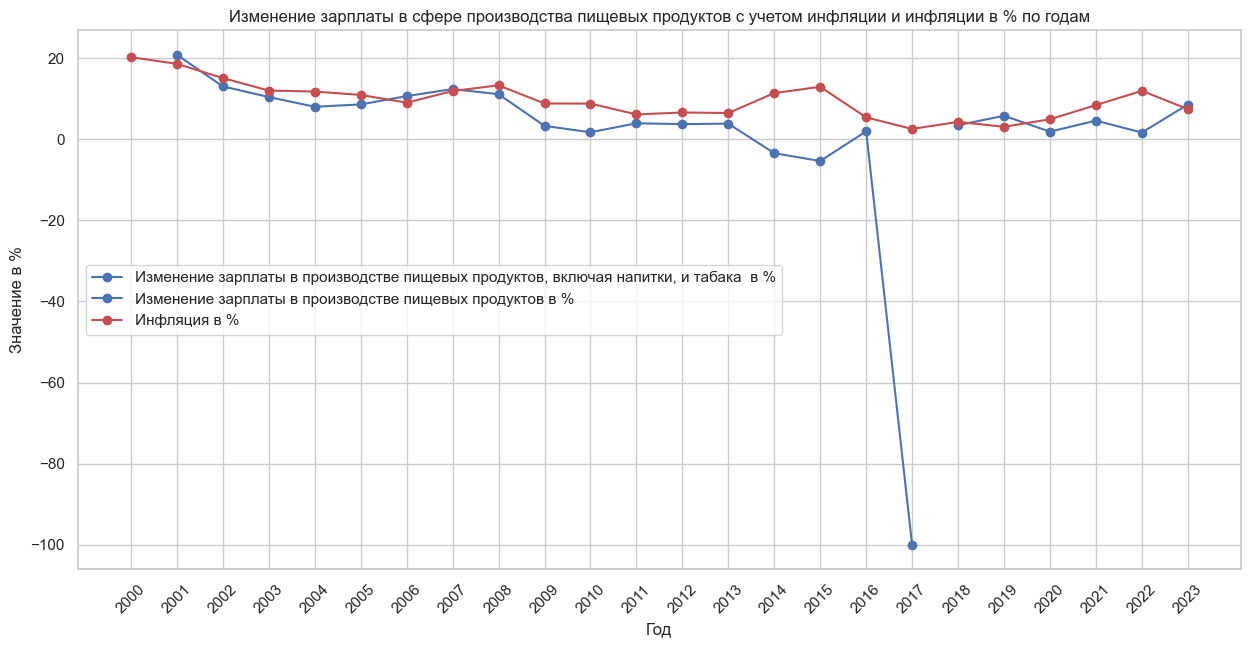

In [892]:
# построим график изменения в % заработной платы с учетом вляиния инфляции и инфляции за 2000-2023
plt.figure(figsize=(15, 7))
plt.plot(data_prod_inf_tr.index, data_prod_inf_tr['изменение1_зарплаты_%'], marker='o', color='b', label='Изменение зарплаты в производстве пищевых продуктов, включая напитки, и табака  в %')
plt.plot(data_prod_inf_tr.index, data_prod_inf_tr['изменение2_зарплаты_%'], marker='o', color='b', label='Изменение зарплаты в производстве пищевых продуктов в %')
plt.plot(data_prod_inf_tr.index, data_prod_inf_tr['инфляция_%'], marker='o', color='r', label='Инфляция в %')
plt.xlabel('Год')
plt.ylabel('Значение в %')
plt.title('Изменение зарплаты в сфере производства пищевых продуктов с учетом инфляции и инфляции в % по годам')
plt.legend(loc='center left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Вывод: несмотря на то, что мы взяли данные с различной группировкой (с 2000 - 2016 - производство пищевых продуктов, напитков и табака, 2017 - 2023 - производство только пищевых продуктов, по графику видно, что рост реальной заработной платы ниже уровня инфляции, за исключением 2001, 2006 и 2019. Для более точной оценки необходимо проанализировать детально каждую части сферы "производство пищевых продуктов, напитков и табака" за 2000 - 2016 гг.**

**Вывод по проекту**

***- загружены данные по номинальной заработной плате и инфляции за период 2000 - 2023***

***- выбраны 3 вида деятельности: производство пищевых продуктов, напитков и табака, образование и строительство и построены графики номинальных***
***зарплат по этим видам за период 2000 - 2023***

***-проведены расчеты изменения заработной платы в выбранных видах с учетом влияния инфляции***

***-построены графики изменений в процентах по заработной плате в сравнении с инфляцией. Сделаны выводы по каждому выбранному виду***

**Образование:**

*-заработная плата с учетом влияния инфляции росла выше уровня инфляции в периоды: 2001 - 2002, 2004 - 2008, 2011-2013, 2017 - 2019, то есть рост реальной заработной платы был выше роста инфляции, в среднем - 8%-12%. Самый значительный рост (25-30%) наблюдался в период 2001 - 2002 гг.*

*-За периоды: 2002 - 2004, 2008 - 2011, 2013 - 2017, 2019 - 2023 уровень инфляции выше, чем рост реальной заработной платы, в среднем рост составлял в эти периоды 0%-5% и есть периоды (2014-2016), где реальная заработная плата снижалась до -8%.*

**Строительство**

*заработная плата с учетом влияния инфляции росла выше уровня инфляции в периоды: 2001, 2003,  2002, 2005 - 2008, 2018 - 2019, то есть рост реальной заработной платы был выше роста инфляции, в среднем - 8%-10%. Самый значительный рост (22-23%) наблюдался в период 2001  гг.*

*За периоды: 2002, 2004, 2009 - 2017, 2020 - 2023 уровень инфляции выше, чем рост реальной заработной платы, в среднем рост составлял в эти периоды 0%-2% и есть периоды (2009, 2013 - 2015), где реальная заработная плата снижалась до -10%.*

**Производство пищевых продуктов, напитков и табака**

*Несмотря на то, что мы взяли данные с различной группировкой (с 2000 - 2016 - производство пищевых продуктов, напитков и табака, 2017 - 2023 - производство только пищевых продуктов, по графику видно, что рост реальной заработной платы ниже уровня инфляции, за исключением 2001, 2006 и 2019. Для более точной оценки необходимо проанализировать детально каждую части сферы "производство пищевых продуктов, напитков и табака" за 2000 - 2016 гг.*